In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN_C

data = pd.read_csv('D:\Activities\cancer\data.csv')

In [119]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradient    286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [121]:
data.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradient      0
dtype: int64

In [122]:
data['breast-quad'].value_counts()

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64

In [123]:
data[data['breast-quad']=='?']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [124]:
data[data['breast'] == 'left']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


#### breast-quad 결손치
left_low로 처리

In [125]:
data['breast-quad'] = data['breast-quad'].replace(['?'], ['left_low'])

In [126]:
data['node-caps'].value_counts()

no     222
yes     56
?        8
Name: node-caps, dtype: int64

In [127]:
data[data['node-caps'] == '?']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [128]:
data[data.duplicated()]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
21,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
78,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
91,no-recurrence-events,50-59,ge40,20-24,0-2,no,3,left,left_up,no
97,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
111,no-recurrence-events,50-59,ge40,15-19,0-2,no,1,right,central,no
112,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
113,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,left_up,no
120,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
142,no-recurrence-events,60-69,ge40,10-14,0-2,no,1,left,left_up,no
171,no-recurrence-events,30-39,premeno,15-19,0-2,no,1,left,left_low,no


#### binary 

In [129]:
object_col = [col for col in data.columns if data[col].dtype == 'object']
object_col

['Class',
 'age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'breast',
 'breast-quad',
 'irradient']

In [130]:
binary_col = [col for col in data.columns if data[col].value_counts().shape[0] == 2]
binary_col

['Class', 'breast', 'irradient']

### 전처리

#### Input
data : 인코딩할 데이터프레임
--> node-caps 제외
#### Output
data : 인코딩된 데이터프레임

In [131]:
def Encode(data):
    # Binary Encoding
    data['Class'] = data['Class'].replace(['no-recurrence-events', 'recurrence-events'], [0, 1])
    data['breast'] = data['breast'].replace(['left', 'right'], [0, 1])
    data['irradient'] = data['irradient'].replace(['no', 'yes'], [0, 1])
    
    # Ordinal Encoding
    data['age'] = data['age'].replace(['10-19', '20-29', '30-39',
                                       '40-49', '50-59', '60-69',
                                       '70-79', '80-89', '90-99'], [1, 2, 3, 4, 5, 6, 7, 8, 9])
    data['tumor-size'] = data['tumor-size'].replace(['0-4', '5-9', '10-14', '15-19', 
                                                     '20-24', '25-29', '30-34', '35-39', 
                                                     '40-44', '45-49', '50-54', '55-59'], 
                                                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    data['inv-nodes'] = data['inv-nodes'].replace(['0-2', '3-5', '6-8', '9-11', 
                                                   '12-14', '15-17', '18-20', '21-23', 
                                                   '24-26', '27-29', '30-32', '33-35', '36-39'],
                                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    # One-hot Encoding
    data = pd.get_dummies(data, columns = ['menopause', 'breast-quad'], prefix=['mp', 'bq'], drop_first=True)
    
    return data

### Impute

#### Input
data : 인코딩할 데이터프레임 --> node-caps 처리
#### Output
data : 인코딩된 데이터프레임

In [132]:
data['node-caps'][data['node-caps']=='?']

145    ?
163    ?
164    ?
183    ?
184    ?
233    ?
263    ?
264    ?
Name: node-caps, dtype: object

In [133]:
def Impute(data):
    # 결측치를 KNN을 통해 맞혀보자
    # dataF : data에 node-caps ? 없는 부분 (node-caps 제외)
    # dataNC : data에 node-caps ? 없는 부분의 node-caps 열
    # dataNA : data에 node-caps ? 있는는 부분 (node-caps 제외)
    dataF = data[data['node-caps']!='?'].drop(['node-caps'], axis=1)
    dataNC = data['node-caps'][data['node-caps'] != '?']
    dataNA = data[data['node-caps']=='?'].drop(['node-caps'], axis=1)
    
    # KNN 위한 전처리
    encoder = LabelEncoder()
    dataNCE = encoder.fit_transform(dataNC)
    
    # KNN
    model = KNN_C(n_neighbors=5, p=2) # 5개의 인접한 그룹, 거리측정기준: 유클리드
    model.fit(dataF, dataNCE)
    
    # Fitting 이후 inverse_Transform 
    data['node-caps'][data['node-caps']=='?'] = encoder.inverse_transform(model.predict(dataNA))
    
    # Binary 인코딩
    data['node-caps'] = data['node-caps'].replace(['no', 'yes'], [0, 1])
    
    return data

### Setting
#### input
전처리 전 데이터

#### output
전처리 된 데이터

In [134]:
data['Class']

0      no-recurrence-events
1      no-recurrence-events
2      no-recurrence-events
3      no-recurrence-events
4      no-recurrence-events
               ...         
281       recurrence-events
282       recurrence-events
283       recurrence-events
284       recurrence-events
285       recurrence-events
Name: Class, Length: 286, dtype: object

In [135]:
def Setting(data):
    data = Encode(data)
    data = Impute(data)
    
    data0 = data.drop(['Class'], axis=1)
    data1 = data['Class']
    
    return data0, data1    

In [136]:
cancer_data, cancer_target = Setting(data)
print(cancer_data.columns)

Index(['age', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast',
       'irradient', 'mp_lt40', 'mp_premeno', 'bq_left_low', 'bq_left_up',
       'bq_right_low', 'bq_right_up'],
      dtype='object')


In [137]:
cancer_data.corr()

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradient,mp_lt40,mp_premeno,bq_left_low,bq_left_up,bq_right_low,bq_right_up
age,1.000000,-0.010559,-0.035112,-0.047623,-0.085968,-0.041769,-0.042080,0.052639,-0.718478,0.016045,0.055275,-0.086699,-0.031672
tumor-size,-0.010559,1.000000,0.160487,0.210529,0.218169,0.049763,0.164418,-0.066389,0.012763,0.007494,0.068617,-0.126855,0.160984
inv-nodes,-0.035112,0.160487,1.000000,0.617629,0.329048,-0.026107,0.324176,-0.072326,-0.022379,0.029879,-0.012051,0.048446,-0.002932
node-caps,-0.047623,0.210529,0.617629,1.000000,0.344108,-0.020473,0.331115,-0.079890,0.027520,-0.009109,-0.012331,0.004167,0.062812
deg-malig,-0.085968,0.218169,0.329048,0.344108,1.000000,-0.052861,0.208099,-0.071934,-0.031758,-0.004221,0.052634,-0.037217,0.020563
breast,-0.041769,0.049763,-0.026107,-0.020473,-0.052861,1.000000,0.018761,-0.058030,0.066228,-0.287669,0.230183,-0.107272,0.187264
irradient,-0.042080,0.164418,0.324176,0.331115,0.208099,0.018761,1.000000,-0.088465,0.054859,0.027108,0.033605,0.038323,-0.047461
mp_lt40,0.052639,-0.066389,-0.072326,-0.079890,-0.071934,-0.058030,-0.088465,1.000000,-0.166350,0.013151,0.029915,-0.047940,0.013621
mp_premeno,-0.718478,0.012763,-0.022379,0.027520,-0.031758,0.066228,0.054859,-0.166350,1.000000,-0.003115,-0.057294,0.086174,0.059001
bq_left_low,0.016045,0.007494,0.029879,-0.009109,-0.004221,-0.287669,0.027108,0.013151,-0.003115,1.000000,-0.570555,-0.241045,-0.287633


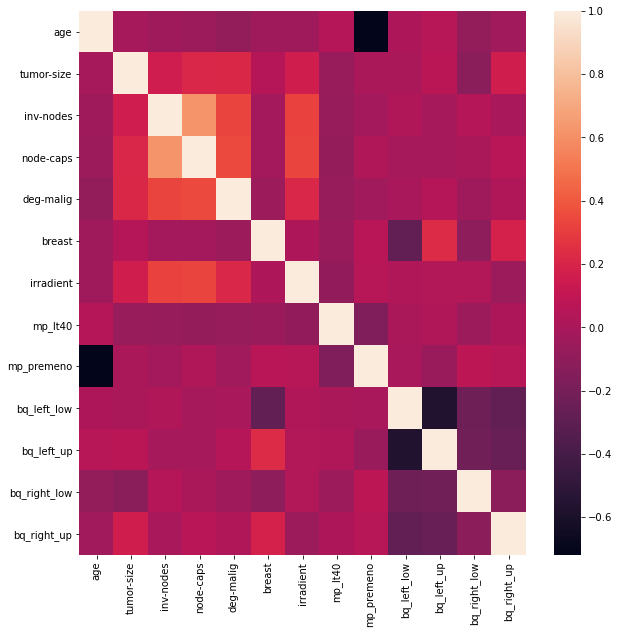

In [138]:
import matplotlib.pyplot as plt 
import seaborn as sns   

plt.figure(figsize=(10,10))  
sns.heatmap(data=cancer_data.corr())

## 전처리 완료 --> 모델 학습 시간~

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [140]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.3)

## 결정트리 
#### 정확도
0.6744

In [141]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.6627906976744186

## KFold
--> 표본이 너무 작아서 그런걸수도 있으니께
--> Stratified K Fold (불균형) --> 실패

In [142]:
from sklearn.model_selection import StratifiedKFold

In [143]:
cancer_target.value_counts()

0    201
1     85
Name: Class, dtype: int64

In [144]:
skf = StratifiedKFold(n_splits=5)
skf.split(cancer_data, cancer_target)

<generator object _BaseKFold.split at 0x000001B307B90740>

In [145]:
skf = StratifiedKFold(n_splits=2)
n_iter = 0

dt_clf = DecisionTreeClassifier()

for train_index, test_index in skf.split(cancer_data, cancer_target):
    X_train, X_test = cancer_data[train_index], cancer_data[test_index]
    y_train, y_test = cancer_target[train_index], cancer_target[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도:{1}, 학습데이터 크기: {2}, 검증 데이터 크기: {3}.'
          .format(n_iter, accuracy, train_size, test_size))
    cv_accuracy.append(accuracy)
    print(np.round(cv_accuracy, 4))
    print(np.mean(cv_accuracy))

KeyError: "None of [Int64Index([101, 102, 103, 104, 105, 106, 107, 108, 109, 110,\n            ...\n            276, 277, 278, 279, 280, 281, 282, 283, 284, 285],\n           dtype='int64', length=143)] are in the [columns]"

## GridSearchCV & 랜덤포레스트

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings('ignore')

In [147]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.3)

param_grid = {'max_depth': [50, 60, 70, 80, 100],
               'min_samples_split': [11,13,15]}

randfor = RandomForestClassifier()

In [148]:
grid_randfor = GridSearchCV(randfor, param_grid=param_grid, cv=3, refit=True)

grid_randfor.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_randfor.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 50, 'min_samples_split': 11}",0.729760,9,0.776119,0.731343,0.681818
1,"{'max_depth': 50, 'min_samples_split': 13}",0.729836,5,0.761194,0.731343,0.696970
2,"{'max_depth': 50, 'min_samples_split': 15}",0.744836,3,0.761194,0.761194,0.712121
3,"{'max_depth': 60, 'min_samples_split': 11}",0.719659,14,0.776119,0.731343,0.651515
4,"{'max_depth': 60, 'min_samples_split': 13}",0.744912,1,0.761194,0.746269,0.727273
5,"{'max_depth': 60, 'min_samples_split': 15}",0.719810,11,0.761194,0.716418,0.681818
6,"{'max_depth': 70, 'min_samples_split': 11}",0.729836,5,0.761194,0.731343,0.696970
7,"{'max_depth': 70, 'min_samples_split': 13}",0.724785,10,0.761194,0.731343,0.681818
8,"{'max_depth': 70, 'min_samples_split': 15}",0.714760,15,0.746269,0.731343,0.666667
9,"{'max_depth': 80, 'min_samples_split': 11}",0.744836,3,0.761194,0.761194,0.712121


In [150]:
print('GridSearchCV 최적 파라미터:', grid_randfor.best_params_)
print('GridSearchCV 최적 정확도:', grid_randfor.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 60, 'min_samples_split': 13}
GridSearchCV 최적 정확도: 0.7449118046132973


## 스태킹 앙상블

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.3)

knn_clf = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators = 50)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 50)

lr_final = LogisticRegression()

In [169]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [170]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, knn_pred))
print(accuracy_score(y_test, rf_pred))
print(accuracy_score(y_test, dt_pred))
print(accuracy_score(y_test, ada_pred))

0.6511627906976745
0.7209302325581395
0.6744186046511628
0.6162790697674418


In [171]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
pred = np.transpose(pred)

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print(accuracy_score(y_test, final))

0.7790697674418605


## SVM

In [116]:
from sklearn.svm import SVC

model = SVC(C=1)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.6744186046511628


## 딥러닝

In [117]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.3)
X_train.shape

(200, 13)

In [47]:
import tensorflow as tf
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))